## Mapped Correlations (figure 1) 

This notebook will be used to:
- Show a map of the ecoregions used in this paper
- The coeficients of Lasso regression for each ecoregion. Variables that do not show up are not chosen by the Lasso. 
    - TODO: significance for chosen variables. 
- Show the historical variance explained by regularized regression for atmos and plant centric variables. 

The data shown in this notebook's figures are generated by train_burn_area_classifier.ipynb

In [55]:
import numpy as np
from matplotlib import pylab as plt
from matplotlib import cm
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
import pandas as pd 
import geopandas as geo
import seaborn as sns
import os

In [29]:
print(os.getcwd())
dataDir = os.path.join('..', 'Data', 'Analysis', 'division_geometries')
geo_df_file = os.path.join(dataDir)
print(geo_df_file)

/Users/sbrey/GoogleDrive/sharedProjects/metSpread/Python
../Data/Analysis/division_geometries


#### Load the Lasso coeficient and $R^2$ values created by __SCRIPTNAME__
- This is a geodataframe where the shapes and associated data are stored as a single data structure

In [30]:
divisions = geo.read_file(dataDir)
divisions.index = divisions.division.values.copy()
divisions

,AREA,division,t2m,tp,si10,RH,slhf,VPD,mrso,e,atmos_r-sq,plant_r-sq,geometry
Marine Division,3.861565e+10,Marine Division,-0.567829,-0.759070,0.925429,-0.502096,0.494675,-0.208936,-0.324658,-0.066400,0.347540,0.219963,(POLYGON ((-122.4591751799346 47.5077287053346...
Marine Regime Mountains,3.050647e+11,Marine Regime Mountains,-0.115140,-0.022966,0.834397,-0.140678,0.200155,0.926422,-0.522683,0.120991,0.955771,0.335573,(POLYGON ((-123.9529577897323 45.5324935644400...
Mediterranean Division,8.918718e+10,Mediterranean Division,0.934456,0.795239,0.567950,-0.412171,0.606076,0.543264,0.271005,0.809904,0.750121,0.099484,(POLYGON ((-118.2534183715204 33.7468069108849...
Mediterranean Regime Mountains,2.415300e+11,Mediterranean Regime Mountains,-0.758537,-0.253800,0.449059,0.594545,-0.033339,-0.898396,0.839490,-0.410785,0.604042,0.554959,POLYGON ((-118.7468180350099 34.83583837405344...
Temperate Desert Division,6.957500e+11,Temperate Desert Division,0.801542,0.085880,-0.567802,0.564195,-0.081039,0.494780,-0.006167,0.405620,0.539917,0.120254,(POLYGON ((-110.255691511287 39.58573912874999...
Temperate Desert Regime Mountains,1.130000e+11,Temperate Desert Regime Mountains,-0.342087,-0.603596,0.060350,0.469680,-0.189947,0.598501,-0.810644,0.932870,0.010862,0.141170,(POLYGON ((-116.9203265874518 40.4735944840465...
Temperate Steppe Regime Mountains,5.844300e+11,Temperate Steppe Regime Mountains,0.352579,0.552668,-0.793730,0.776944,-0.048715,-0.515915,-0.670124,0.798052,0.091106,0.548830,(POLYGON ((-104.2797775681042 44.7604408312882...
Tropical/Subtropical Desert Division,4.495000e+11,Tropical/Subtropical Desert Division,0.240721,-0.731174,0.965963,0.242048,0.303080,-0.598587,-0.689678,0.740006,0.964735,0.826865,POLYGON ((-101.9419173542224 31.21309074628787...
Tropical/Subtropical Regime Mountains,1.302000e+11,Tropical/Subtropical Regime Mountains,-0.860514,0.986256,-0.615492,0.586885,-0.041407,0.087649,0.128950,0.776068,0.376291,0.475516,(POLYGON ((-105.8721695834743 35.4560089643861...
Tropical/Subtropical Steppe Division,6.597828e+11,Tropical/Subtropical Steppe Division,-0.150302,0.625886,-0.489566,0.488531,-0.673912,0.174272,-0.139565,-0.770802,0.861477,0.892146,(POLYGON ((-97.01796727329044 27.9451595718080...


In [23]:
usa = geo.read_file('../Data/GIS/cb_2017_us_state_500k')

Set static division colors 

In [24]:
tab10 = cm.get_cmap('tab10', 10)
division_colors = tab10(range(10))
division_colors[0][0:3]
division_colors_hex = []
for i in range(10) :
    division_colors_hex.append(matplotlib.colors.to_hex(division_colors[i][0:3]))
    
division_colors_hex
divisions['division_colors'] = division_colors_hex

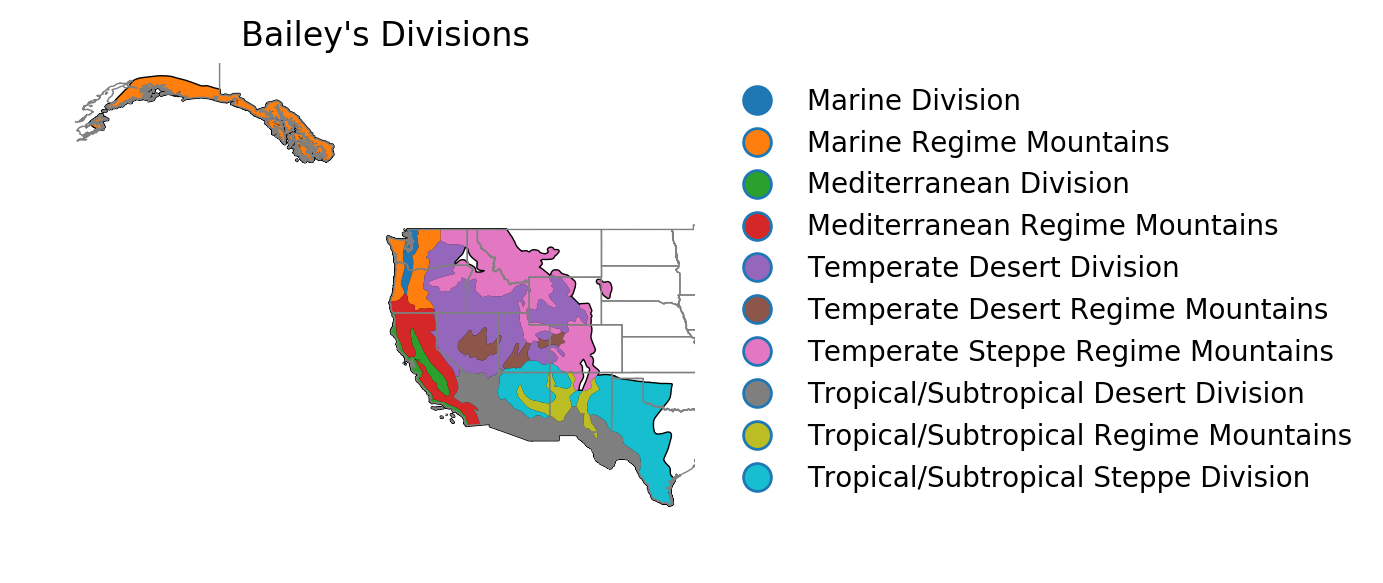

In [96]:
# Show the disolved divisions 
f, ax = plt.subplots(1, figsize=(4, 3), dpi=200)
ax.axis('off')

#base = usa.plot(ax=ax, color="white", edgecolor="black")
base = divisions.plot(ax=ax, color="white", edgecolor="black")
ax1 = divisions.plot(ax=base, column='division', cmap=tab10, categorical=True,legend=True)
plt.title("Bailey's Divisions")

ax2=usa.plot(ax=base, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(left=-155, right=-95)
ax2.set_ylim(bottom=25, top=63)

# handle the legend
leg = ax1.get_legend()
leg.set_bbox_to_anchor((0.6, 1, 1.5, 0.0))
leg.set_label(divisions.division)
leg.set_frame_on(False)


Show the variance explained by each of the categories of predictors, when only a single type is allowed to explain historical variance.

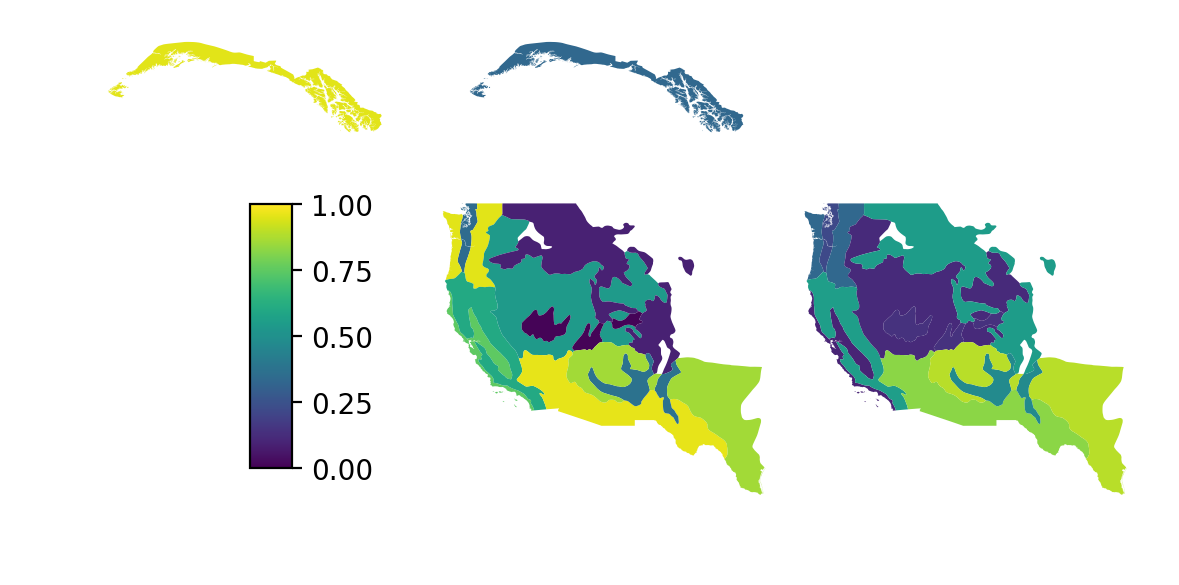

In [100]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=True, sharey=True, figsize=(7, 3.3), dpi=200)
ax1.axis('off')
ax2.axis('off')
divisions.plot(ax=ax1, column='atmos_r-sq',  vmin=0, vmax=1, legend=False)
divisions.plot(ax=ax2, column='plant_r-sq',  vmin=0, vmax=1, legend=False)
plt.subplots_adjust(wspace=-.5, hspace=0) # reduce spaces between panes

im = plt.gca().get_children()[0]
# [left, bottom, width, height]
# for horizontal bar
#cax = fig.add_axes([0.25, 0, 0.5,0.05]) 
#fig.colorbar(im, cax=cax, orientation="horizontal")
cax = fig.add_axes([0.25, .2, 0.03, 0.4]) 
fig.colorbar(im, cax=cax, orientation="vertical")

In [104]:
coef_df = divisions[['t2m','tp','si10','RH','slhf','VPD','mrso','e']].copy()
coef_df

,t2m,tp,si10,RH,slhf,VPD,mrso,e
Marine Division,-0.567829,-0.759070,0.925429,-0.502096,0.494675,-0.208936,-0.324658,-0.066400
Marine Regime Mountains,-0.115140,-0.022966,0.834397,-0.140678,0.200155,0.926422,-0.522683,0.120991
Mediterranean Division,0.934456,0.795239,0.567950,-0.412171,0.606076,0.543264,0.271005,0.809904
Mediterranean Regime Mountains,-0.758537,-0.253800,0.449059,0.594545,-0.033339,-0.898396,0.839490,-0.410785
Temperate Desert Division,0.801542,0.085880,-0.567802,0.564195,-0.081039,0.494780,-0.006167,0.405620
Temperate Desert Regime Mountains,-0.342087,-0.603596,0.060350,0.469680,-0.189947,0.598501,-0.810644,0.932870
Temperate Steppe Regime Mountains,0.352579,0.552668,-0.793730,0.776944,-0.048715,-0.515915,-0.670124,0.798052
Tropical/Subtropical Desert Division,0.240721,-0.731174,0.965963,0.242048,0.303080,-0.598587,-0.689678,0.740006
Tropical/Subtropical Regime Mountains,-0.860514,0.986256,-0.615492,0.586885,-0.041407,0.087649,0.128950,0.776068
Tropical/Subtropical Steppe Division,-0.150302,0.625886,-0.489566,0.488531,-0.673912,0.174272,-0.139565,-0.770802


Rearrange data to be friendly to plotting in seaborn. 

In [105]:
# TODO: Figure out how to do this without a loop but rather a pandas.reshape sort 
# TODO: of built in argument. 

n = coef_df.shape[0] * coef_df.shape[1]
df_ = pd.DataFrame(index=range(n), columns=['r', 'var', 'division'])
df_ = df_.fillna(0) # with 0s rather than NaNs

count = -1
for var in coef_df.columns.values : 
    for div in coef_df.index.values :
        count += 1 
        
        r = coef_df.loc[div, var].copy()
        # Print statement offers sanity check to make sure
        # data sorted to match grid above
        #print(var + ' ' + div + ': ' + str(r) ) 
        
        df_.loc[count, 'r'] = r
        df_.loc[count, 'var'] = var
        df_.loc[count, 'division'] = div

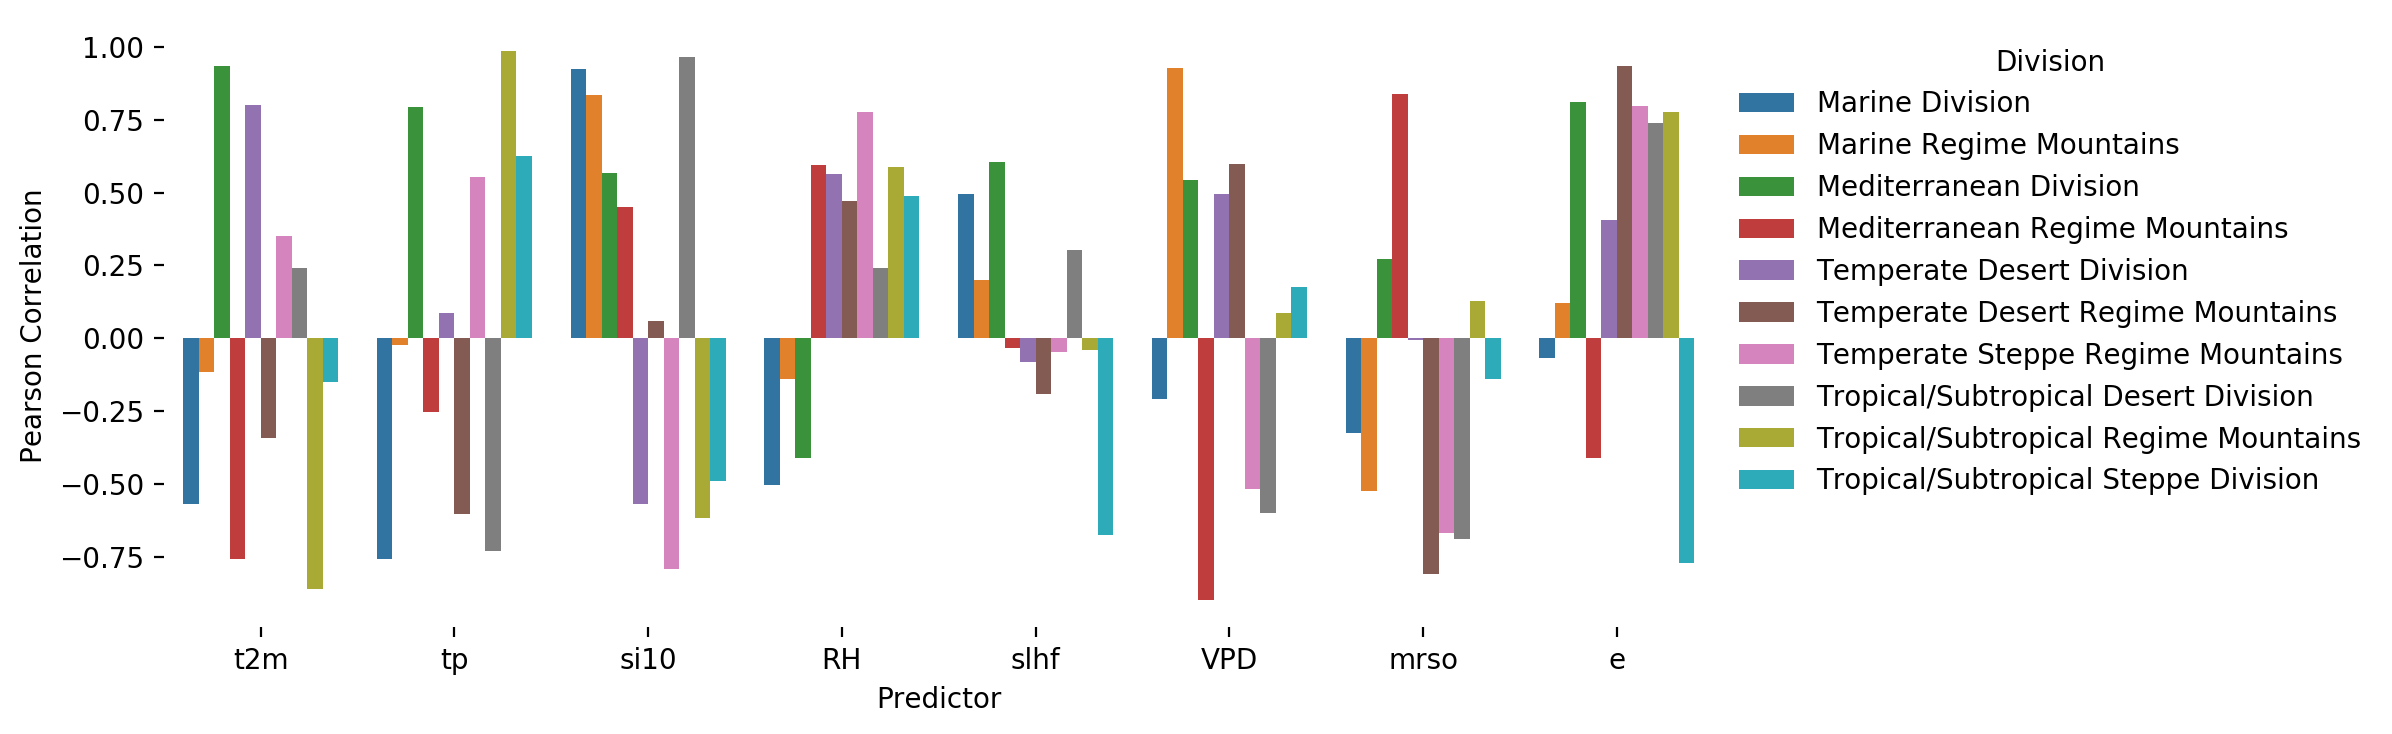

In [106]:
plt.figure(dpi=200, figsize=(10, 4))
ax = sns.barplot(x="var", y="r", hue="division", data=df_, palette="tab10")
ax.legend( bbox_to_anchor=(1,1.), title="Division", frameon=False)
#ax.set_xticklabels(labels = ,rotation=30)
ax.set(xlabel='Predictor', ylabel='Pearson Correlation')
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True) # gets rid of non-nessisary lines
plt.show()

Make all three of the above plots work together below. 

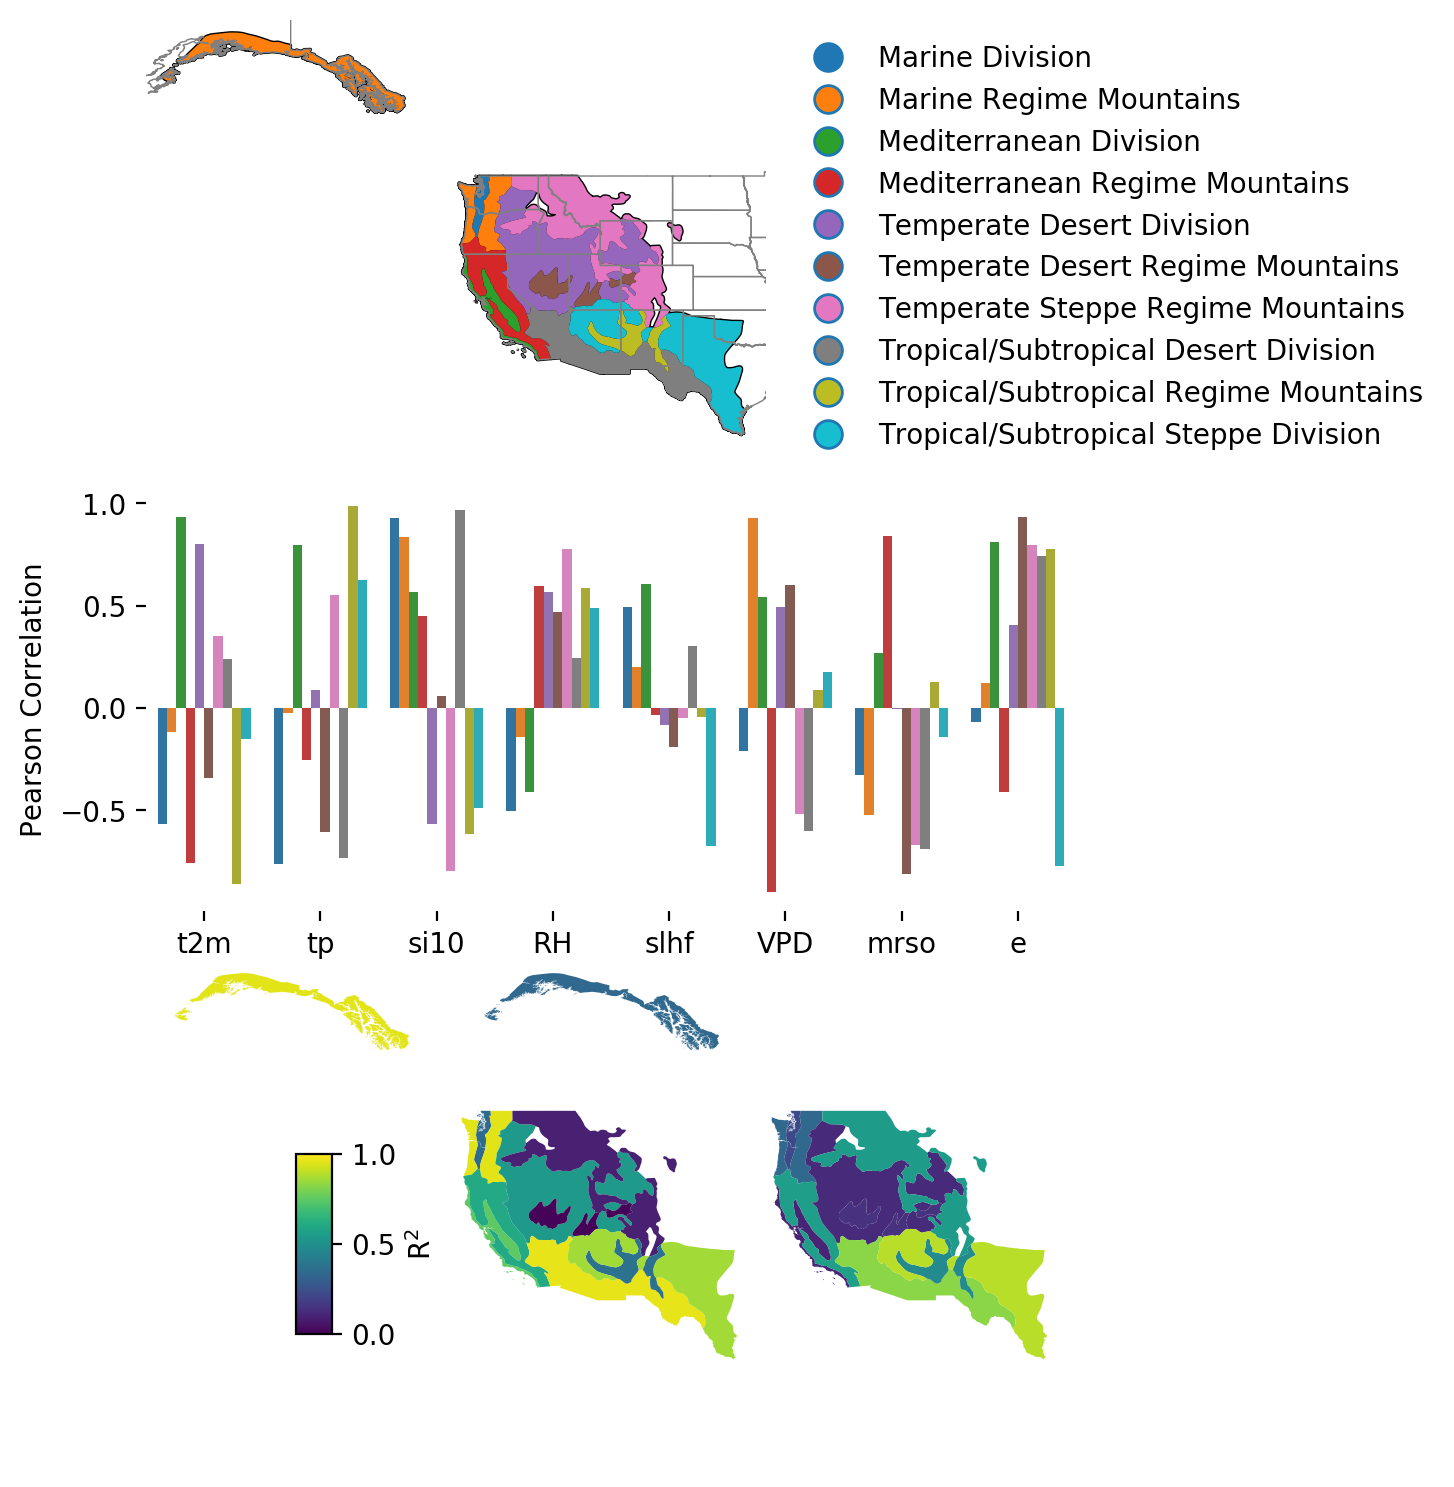

In [152]:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(6,9), dpi=200)

gs=GridSpec(3,2) # 2 rows, 2 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[1,:]) # Second row, span all columns
ax3=fig.add_subplot(gs[2,0]) # Third row, span all columns
ax4=fig.add_subplot(gs[2,1]) # Third row, span all columns

# First Row -----
ax1.axis('off')

#base = usa.plot(ax=ax, color="white", edgecolor="black")
base = divisions.plot(ax=ax1, color="white", edgecolor="black")
ax_div = divisions.plot(ax=base, column='division', cmap=tab10, categorical=True,legend=True)
plt.title("")

ax_usa=usa.plot(ax=base, facecolor='none', edgecolor="gray", linewidth=0.5)
ax_usa.set_xlim(left=-155, right=-95)
ax_usa.set_ylim(bottom=25, top=63)

# handle the legend
leg = ax_div.get_legend()
leg.set_bbox_to_anchor((0.6, 1, 1.5, 0.0))
leg.set_label(divisions.division)
leg.set_frame_on(False)


# Second Row ------
#ax2.axis('off')

sns.barplot(ax=ax2, x="var", y="r", hue="division", data=df_, palette="tab10")
ax2.get_legend().set_visible(False)
ax2.set(xlabel='', ylabel='Pearson Correlation')
ax2.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True) # gets rid of non-nessisary lines

# Bottom row 
ax3.axis('off'); 
ax3.set(xlabel='Atmos R$^{2}$')
ax4.axis('off')
ax4.set(xlabel='Plant R$^{2}$')

divisions.plot(ax=ax3, column='atmos_r-sq',  vmin=0, vmax=1, legend=False)
divisions.plot(ax=ax4, column='plant_r-sq',  vmin=0, vmax=1, legend=False)
plt.subplots_adjust(wspace=-.5, hspace=.1)
im = plt.gca().get_children()[0]
# [left, bottom, width, height]
cax = fig.add_axes([0.25, .15, 0.03, 0.1]) 
fig.colorbar(im, cax=cax, orientation="vertical", label="R$^{2}$")

fig.savefig('gridspec.png')